# 4.9 Intro to Data Visualization with Python.ipynb — TOC
	1.	Setup (imports + paths)
	2.	Exercise: Bar charts
	3.	Exporting charts
	4.	Histograms + scatterplots
	5.	Line charts + sampling
	6.	Recap

# Importing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import datasets
path = r'/Users/spencer/Documents/Career Foundry/Data Immersion/4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

# Exercise

## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

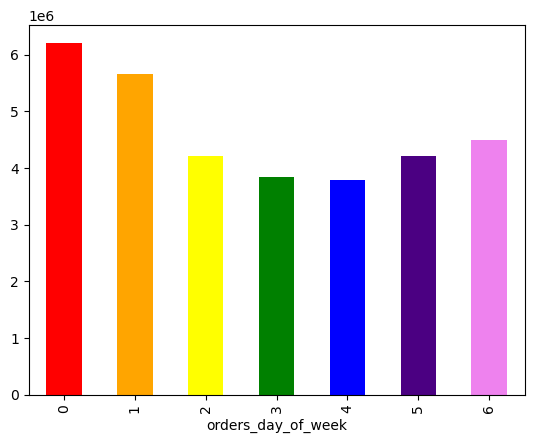

In [3]:
# Create a bar chart
# Add index sorting and colors
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

## Exporting Charts

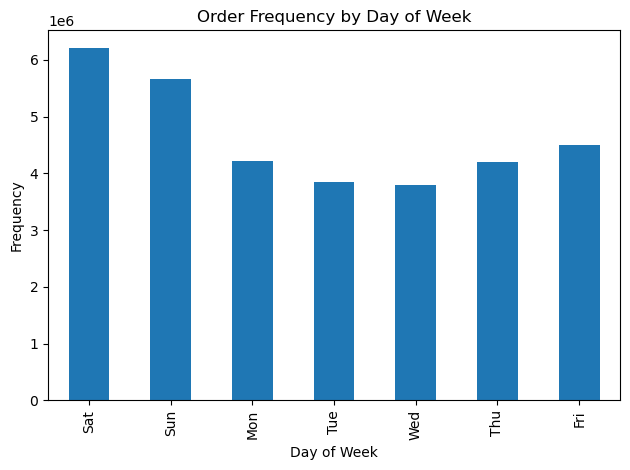

In [17]:
# Assign chart to variable
day_map = {0:"Sat", 1:"Sun", 2:"Mon", 3:"Tue", 4:"Wed", 5:"Thu", 6:"Fri"}

bar = (ords_prods_merge["orders_day_of_week"]
       .value_counts()
       .sort_index()
       .rename(index=day_map)
       .plot.bar())

bar.set_ylabel("Frequency")
bar.set_xlabel("Day of Week")
bar.set_title("Order Frequency by Day of Week")
plt.tight_layout()
plt.show()

In [5]:
# Export to image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

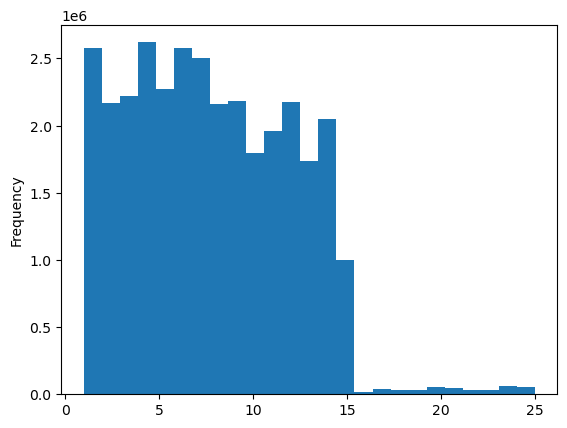

In [6]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

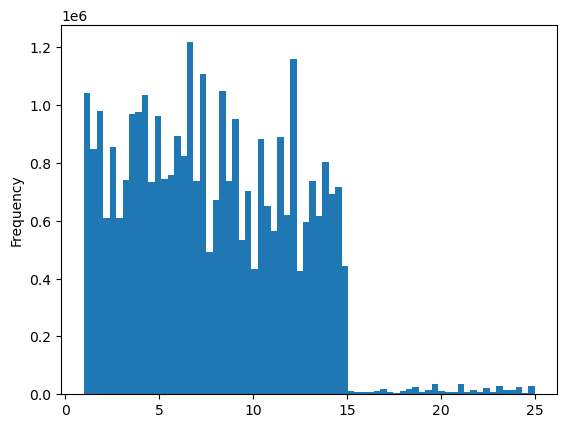

In [7]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [8]:
# Export to image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25bin.png'))
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70bin.png'))

## Creating Line Charts and Sampling Data

In [9]:
# Make 70/30 split of data.
np.random.seed(4) # Random values will be same every time with same seed

# Create array of boolean values based on > or < 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7
# random: creates random numbers
# rand: ensures the random numbers generated by 'random' follow the uniform distribution

#### Recap of above steps:
1. Set the seed for the random number generator.
2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [10]:
# View list
dev

array([False,  True, False, ...,  True, False,  True], shape=(32434489,))

In [11]:
# Store 70% of the sample in the dataframe big (searches for true values)
big = ords_prods_merge[dev]

In [12]:
# Store 30% of the sample in the dataframe small (searches for false values)
small = ords_prods_merge[~dev]

In [13]:
# Check sizes to ensure data integrity
len(ords_prods_merge)

32434489

In [14]:
len(big) + len(small)

32434489

In [15]:
# Only include necessary columns
df_2 = small[['orders_day_of_week','prices']]

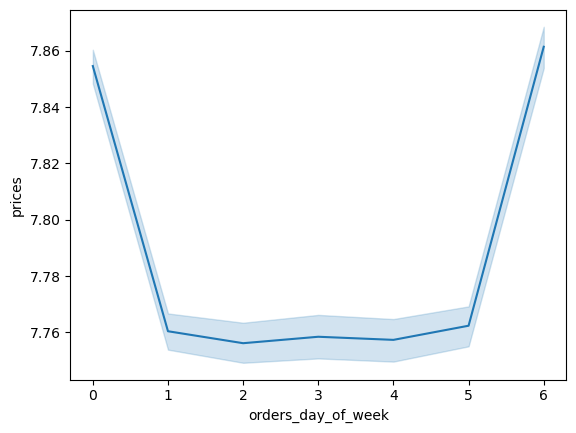

In [16]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')